In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [32]:
train = pd.read_pickle("sus_bos_train.pkl")
val = pd.read_pickle("sus_bos_test.pkl")
combined = pd.concat([train, val])

In [33]:
train.head()

,sequence,label,len,bin
32047,"[0, 2, 0, 2, 3, 2, 3, 3, 1, 0, 2, 1, 0, 2, 3, ...",1,959,6
87775,"[0, 0, 1, 0, 1, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, ...",1,911,6
99412,"[0, 3, 2, 3, 1, 1, 0, 1, 1, 0, 3, 2, 2, 1, 1, ...",1,393,1
83839,"[0, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 1, 2, 2, ...",0,243,0
99263,"[0, 3, 2, 2, 0, 2, 3, 3, 3, 1, 2, 2, 1, 3, 2, ...",0,426,2


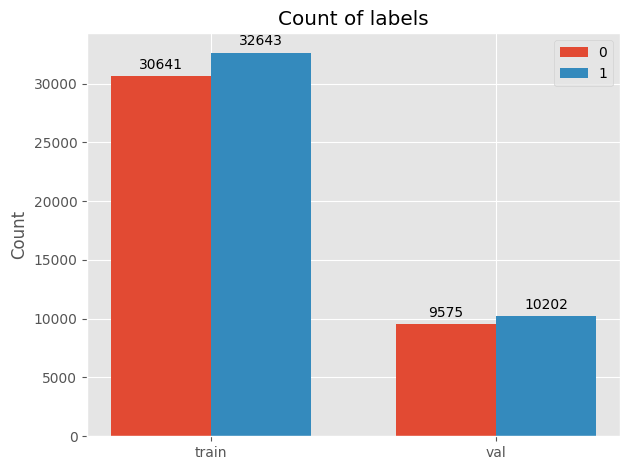

In [34]:
labels = ["train", "val"]
zeros = [train.label.value_counts()[0], val.label.value_counts()[0]]
ones = [train.label.value_counts()[1], val.label.value_counts()[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, zeros, width, label='0')
rects2 = ax.bar(x + width / 2, ones, width, label='1')

ax.set_ylabel('Count')
ax.set_title('Count of labels')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [35]:
max_seq_len = combined["len"].max()
min_seq_len = combined["len"].min()
avg_seq_len = combined["len"].mean()

print(f"Max Sequence Length: {max_seq_len}")
print(f"Min Sequence Length: {min_seq_len}")
print(f"Avg Sequence Length: {int(avg_seq_len)}")

Max Sequence Length: 100062
Min Sequence Length: 32
Avg Sequence Length: 1692


<AxesSubplot:>

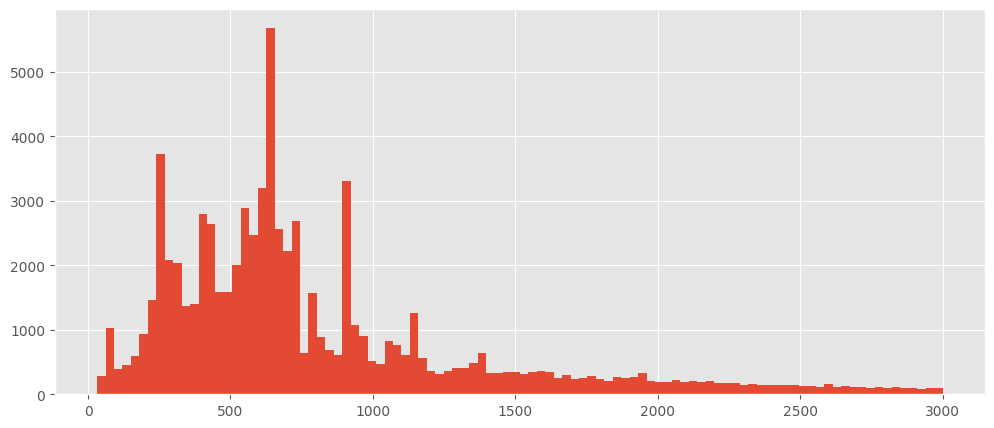

In [36]:
combined[combined.len < 3000].len.hist(bins=100, figsize=(12, 5))

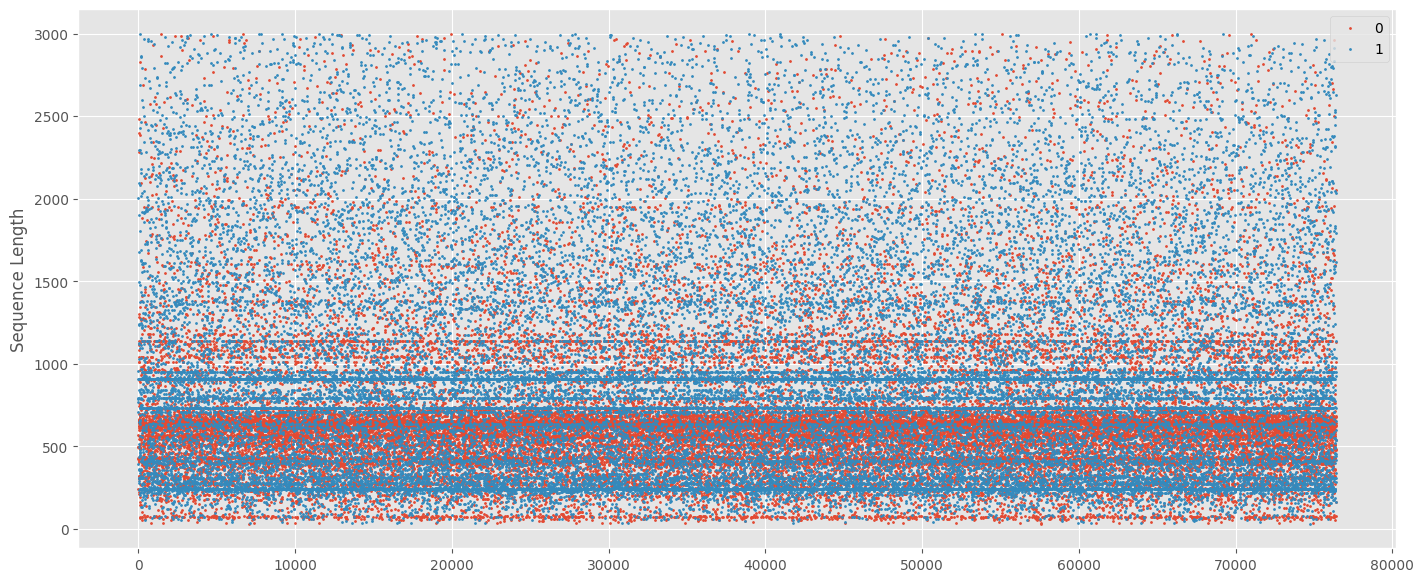

In [37]:
groups = combined[combined.len < 3000]
groups = groups.reset_index().groupby('label')

fig, axs = plt.subplots(figsize=(17, 7))
for name, group in groups:
    plt.plot(group.index, group.len, marker='o', linestyle='', markersize=1, label=name)

axs.set_ylabel('Sequence Length')
plt.legend()